# House Prices - Advanced Regression Techniques

***

Predict sales prices and practice feature engineering, RFs, and gradient boosting

***

**PROJECT DESCRIPTION:**



**DATA FIELDS**

Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale


# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler

# HELPER FUNCTIONS

# LOADING DATA

In [2]:
# data import
df_train_raw = pd.read_csv('train.csv')
df_test_raw = pd.read_csv('test.csv')
y_test_raw = pd.read_csv('sample_submission.csv')

# merge test dataset and sample submission dataset
df_test_raw = pd.merge(df_test_raw, y_test_raw, on = 'Id', how = 'inner')

# merge train and test dataset
df1 = pd.concat([df_train_raw, df_test_raw])

df1.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
303,304,20,RL,70.0,9800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2006,WD,Abnorml,149900.000000
29,1490,20,FV,84.0,10440,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,165845.938617
475,1936,60,RL,59.0,9535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,179136.097888
262,263,80,RL,88.0,8471,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2006,WD,Normal,151000.000000
245,246,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,241500.000000


# DATA DESCRIPTION

## DATA TYPES

In [3]:
#shape
df1.shape

(2919, 81)

In [4]:
# columns
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# data types
for f in df1:
    a = abs(len(f) - 20)
    print(f + (" " * a)  + str(df1[f].dtypes))

Id                  int64
MSSubClass          int64
MSZoning            object
LotFrontage         float64
LotArea             int64
Street              object
Alley               object
LotShape            object
LandContour         object
Utilities           object
LotConfig           object
LandSlope           object
Neighborhood        object
Condition1          object
Condition2          object
BldgType            object
HouseStyle          object
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle           object
RoofMatl            object
Exterior1st         object
Exterior2nd         object
MasVnrType          object
MasVnrArea          float64
ExterQual           object
ExterCond           object
Foundation          object
BsmtQual            object
BsmtCond            object
BsmtExposure        object
BsmtFinType1        object
BsmtFinSF1          float64
BsmtFinType2        object
BsmtFinSF2          float64
Bsmt

## MISSING VALUES

In [6]:
# Missing values
missing = df1.isnull().sum()
aux = pd.DataFrame(missing[missing > 0].sort_values(ascending = False), columns = ['variables'])

# count + percentage
aux['percentage'] = aux['variables'].apply(lambda x : (x / (df1.shape[0]) * 100))

aux

,variables,percentage
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,159,5.447071
GarageYrBlt,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071


In [7]:
# dropping missing values > 40%
df1 = df1.drop(columns=aux[aux['percentage'] > 40].index)

# ffill missing values < 1
df1.loc[:, aux[aux['percentage'] < 1].index] = df1.loc[:, aux[aux['percentage'] < 1].index].fillna(method = 'ffill') 

# fillna - mode
aux2 = df1.loc[:, aux[(aux['percentage'] > 1) & (aux['percentage'] < 17)].index]

for c in aux2.columns:
    df1[c].fillna(df1[c].mode()[0], inplace=True)

# Missing values
missing = df1.isnull().sum()
aux = pd.DataFrame(missing[missing > 0].sort_values(ascending = False), columns = ['variables'])

aux

,variables


# DIMENSIONS ANALYSIS

In [8]:
# numerical attributes
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

# categorical attributes
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64'])

### Numerical Features

In [9]:
cols = num_attributes.columns

def funcao_value_counts():
    for d in num_attributes[cols]:
        print((num_attributes[d].value_counts(normalize = True) * 100).sort_values(ascending = False))
        
funcao_value_counts()


2049    0.034258
2       0.034258
4       0.034258
2053    0.034258
6       0.034258
          ...   
2041    0.034258
2043    0.034258
2005    0.034258
1869    0.034258
2047    0.034258
Name: Id, Length: 2919, dtype: float64
20     36.964714
60     19.698527
50      9.832134
120     6.235012
30      4.761905
70      4.385063
160     4.385063
80      4.042480
90      3.734156
190     2.089757
85      1.644399
75      0.787941
45      0.616650
180     0.582391
40      0.205550
150     0.034258
Name: MSSubClass, dtype: float64
60.0     26.104830
80.0      4.693388
70.0      4.556355
50.0      4.008222
75.0      3.597122
           ...    
111.0     0.034258
135.0     0.034258
123.0     0.034258
25.0      0.034258
141.0     0.034258
Name: LotFrontage, Length: 128, dtype: float64
9600     1.507366
7200     1.473107
6000     1.164782
9000     0.993491
10800    0.856458
           ...   
1879     0.034258
12122    0.034258
14215    0.034258
14171    0.034258
8842     0.034258
Name: LotArea, 

In [10]:
dropcols = ['Id','OverallQual', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
           'BsmtFullBath', 'BsmtHalfBath']

num_attributes.drop(num_attributes[dropcols], axis = 1, inplace = True)

/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Categorical Features

In [11]:
cols = cat_attributes.columns

def funcao_value_counts():
    for d in cat_attributes[cols]:
        print((cat_attributes[d].value_counts(normalize = True) * 100).sort_values(ascending = False))
        
funcao_value_counts()


RL         77.663583
RM         15.827338
FV          4.761905
RH          0.890716
C (all)     0.856458
Name: MSZoning, dtype: float64
Pave    99.5889
Grvl     0.4111
Name: Street, dtype: float64
Reg    63.686194
IR1    33.162042
IR2     2.603631
IR3     0.548133
Name: LotShape, dtype: float64
Lvl    89.825283
HLS     4.110997
Bnk     4.008222
Low     2.055498
Name: LandContour, dtype: float64
AllPub    99.965742
NoSeWa     0.034258
Name: Utilities, dtype: float64
Inside     73.072970
Corner     17.505995
CulDSac     6.029462
FR2         2.911956
FR3         0.479616
Name: LotConfig, dtype: float64
Gtl    95.169579
Mod     4.282288
Sev     0.548133
Name: LandSlope, dtype: float64
NAmes      15.176430
CollgCr     9.146968
OldTown     8.187736
Edwards     6.646112
Somerst     6.235012
NridgHt     5.686879
Gilbert     5.652621
Sawyer      5.173004
NWAmes      4.487838
SawyerW     4.282288
Mitchel     3.905447
BrkSide     3.699897
Crawfor     3.528606
IDOTRR      3.186023
Timber      2.46

In [12]:
dropcols = ['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
           'Condition2', 'RoofStyle', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2',
           'HeatingQC', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
           'SaleType', 'CentralAir', 'Street', 'LandSlope', 'RoofMatl', 'BsmtCond', 'Functional']

cat_attributes.drop(cat_attributes[dropcols], axis = 1, inplace = True)

# DESCRIPTIVE STATISTICS

## Numerical Attributes

In [13]:
# Central Tendency - mean, median, mode
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
#ct3 = pd.DataFrame(num_attributes.apply(mode)).T

# Dipersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

# concat
t = pd.concat([ct1, ct2, d1, d2, d3, d4]).T.reset_index()
t.columns = ['attributes', 'mean', 'median', 'std', 'min', 'max', 'range']
t

,attributes,mean,median,std,min,max,range
0,MSSubClass,57.137718,50.000000,42.510344,20.0,190.0,170.0
1,LotFrontage,67.756423,63.000000,21.588841,21.0,313.0,292.0
2,LotArea,10168.114080,9453.000000,7885.645268,1300.0,215245.0,213945.0
3,OverallCond,5.564577,5.000000,1.112940,1.0,9.0,8.0
4,YearBuilt,1971.312778,1973.000000,30.286252,1872.0,2010.0,138.0
5,BsmtFinSF2,49.565262,0.000000,169.150123,0.0,1526.0,1526.0
6,BsmtUnfSF,560.750257,467.000000,439.394638,0.0,2336.0,2336.0
7,TotalBsmtSF,1051.610826,989.000000,440.707309,0.0,6110.0,6110.0
8,LowQualFinSF,4.694416,0.000000,46.388876,0.0,1064.0,1064.0
9,GrLivArea,1500.759849,1444.000000,505.964355,334.0,5642.0,5308.0


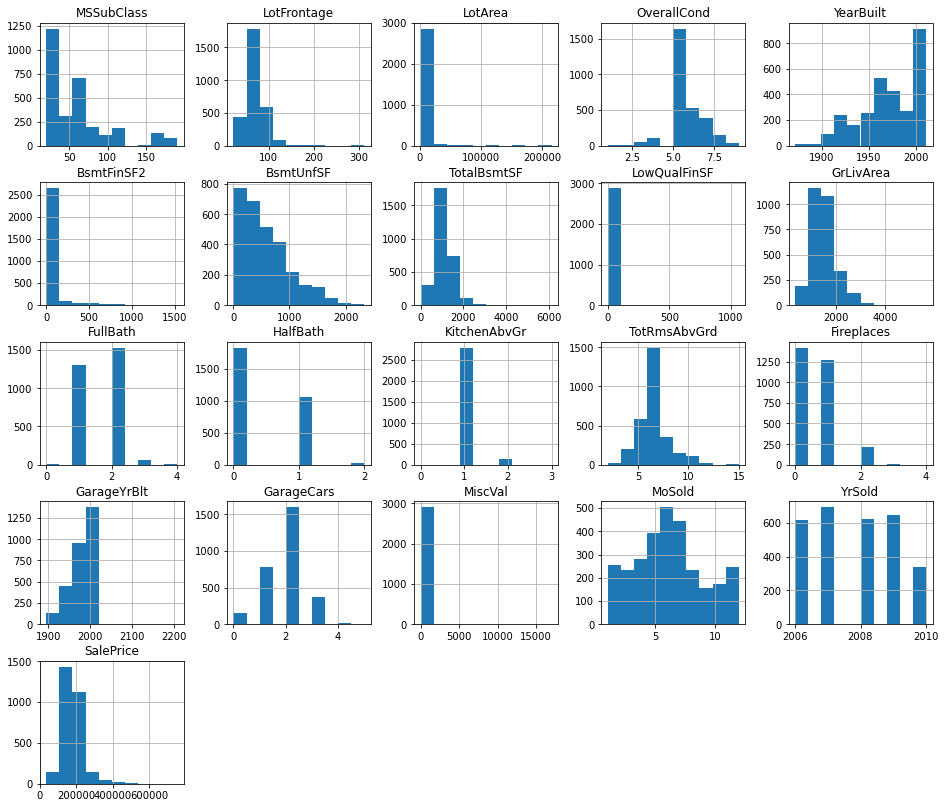

In [17]:
df1[num_attributes.columns].hist(figsize=(16,14));


/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


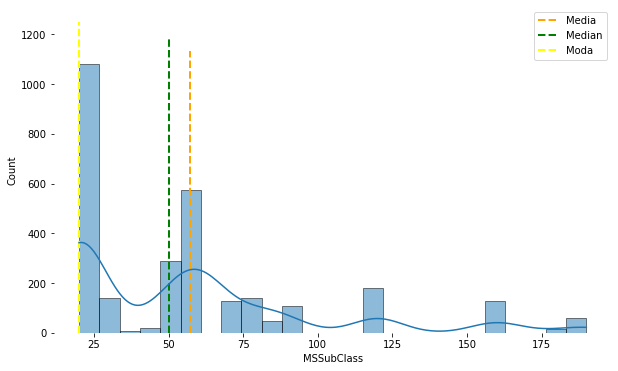

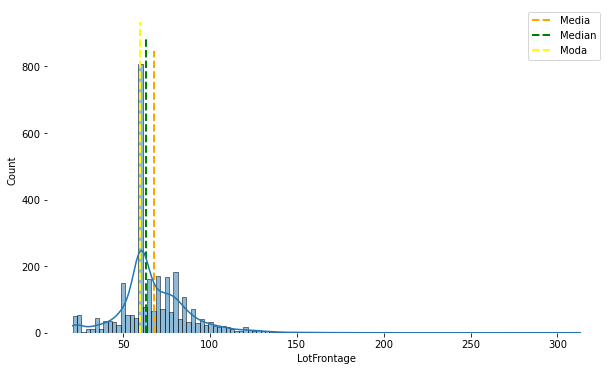

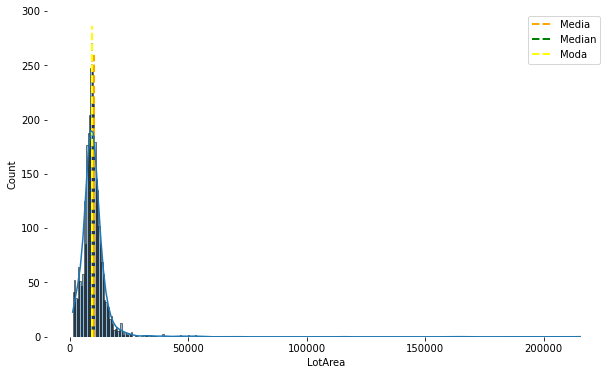

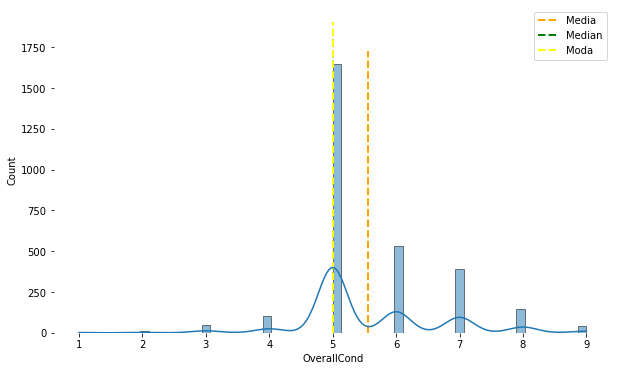

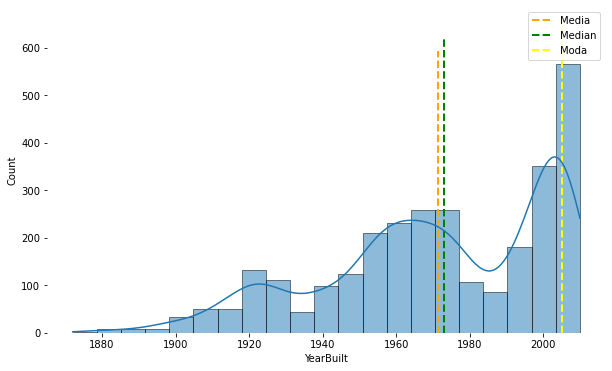

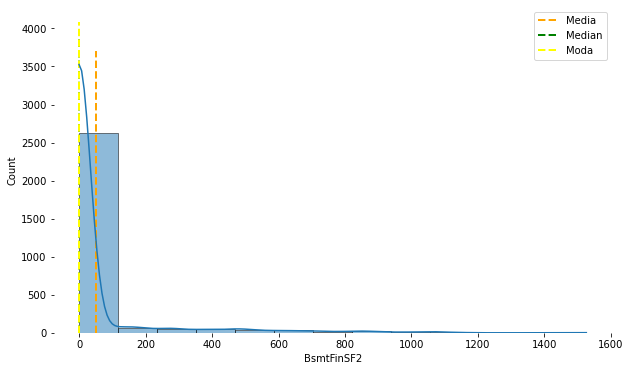

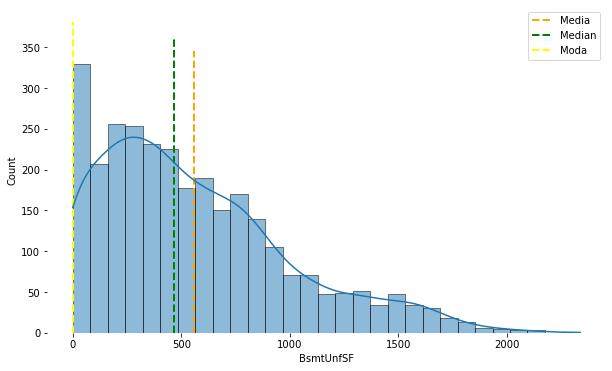

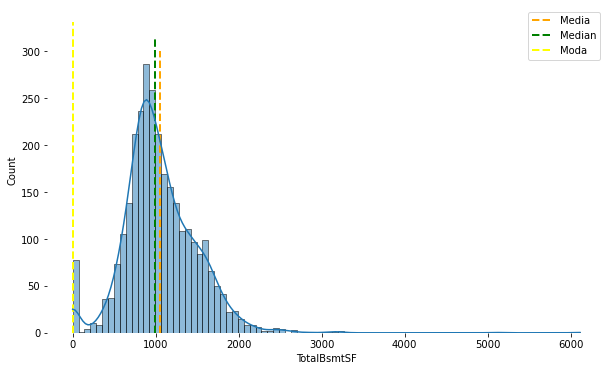

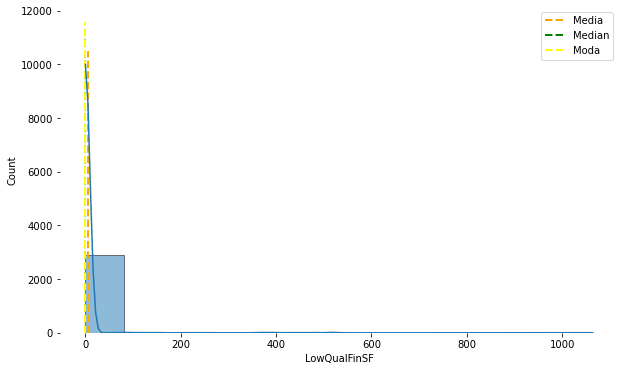

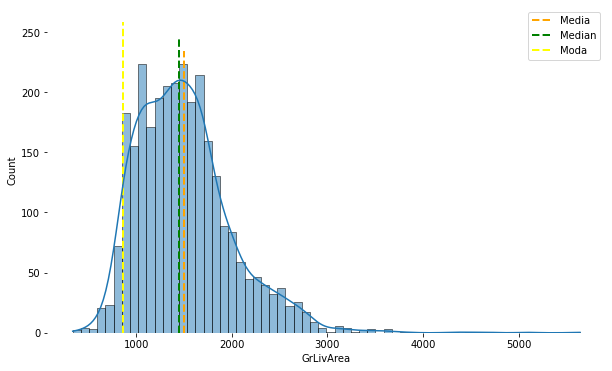

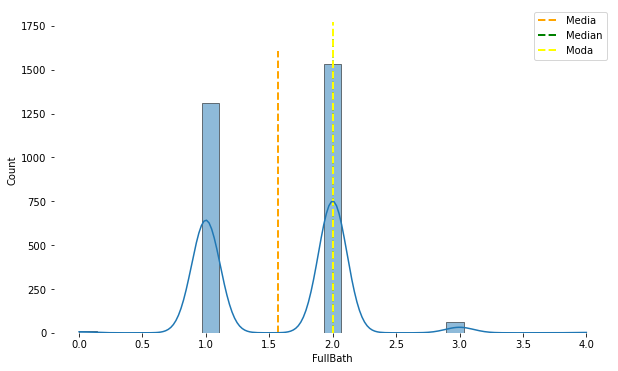

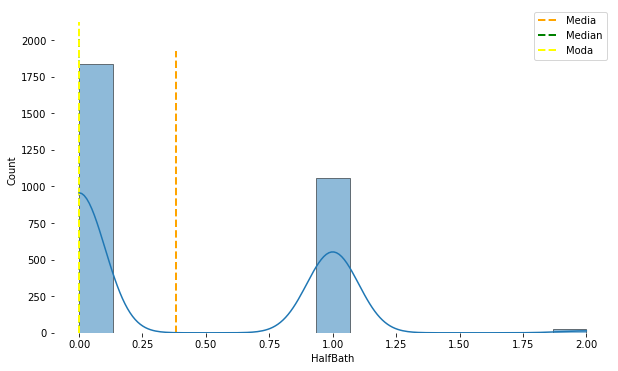

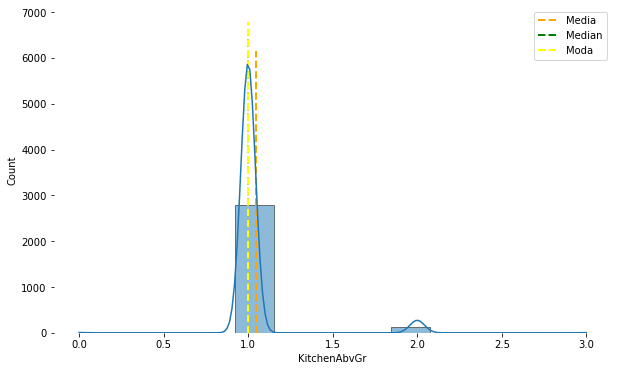

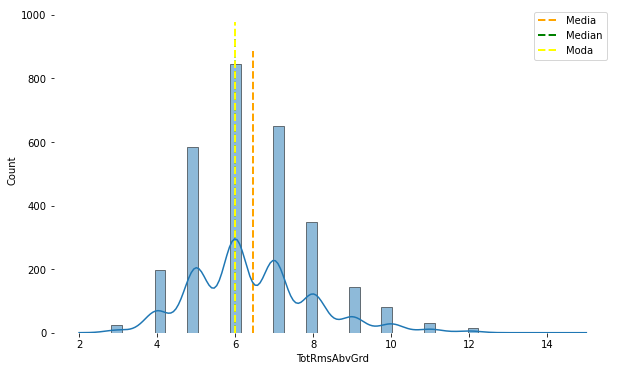

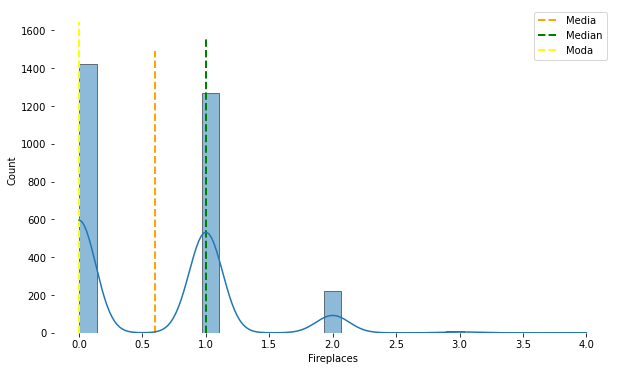

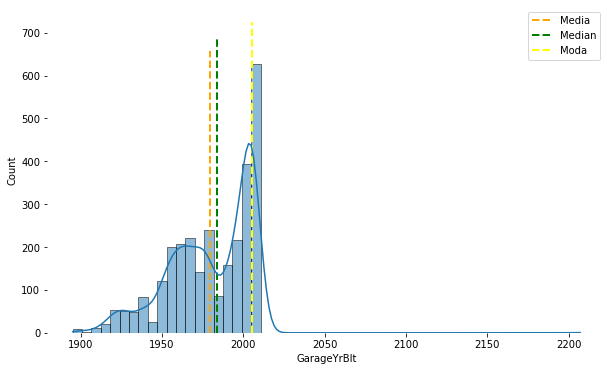

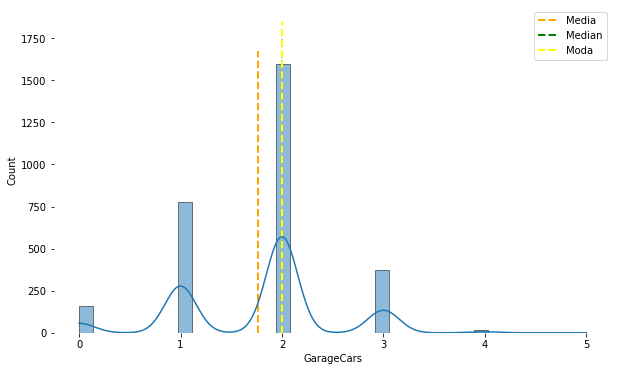

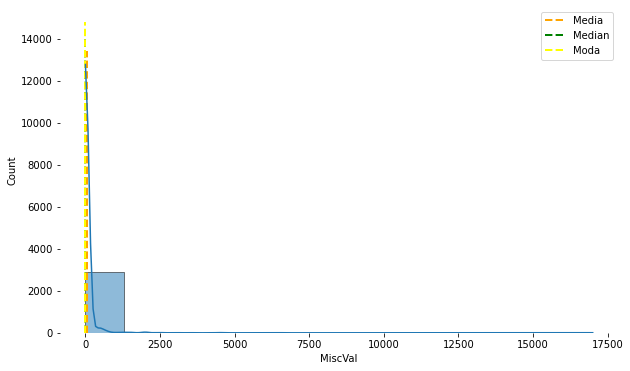

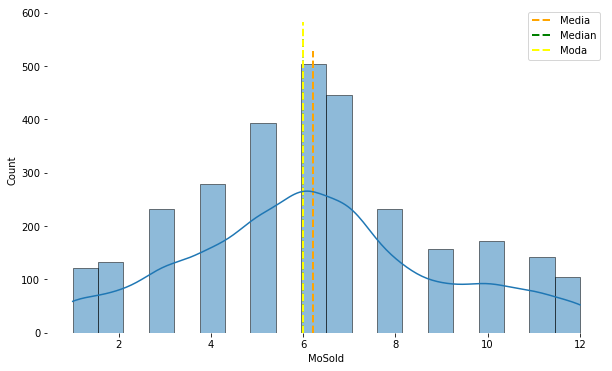

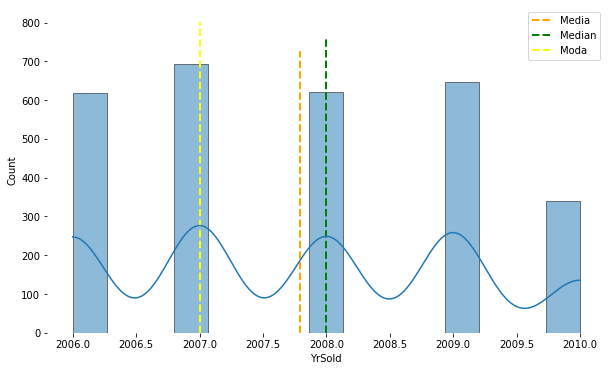

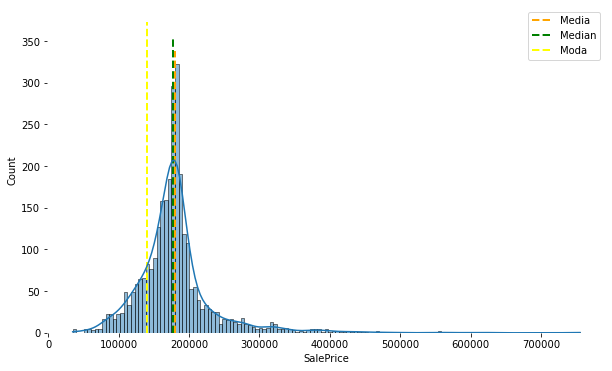

In [25]:
for a in df1[num_attributes.columns]:
    
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(df1[num_attributes.columns][a], kde = True, linewidth = 0.5)
    sns.despine(bottom = True, left = True)
    
    plt.vlines( x = df1[num_attributes.columns][a].mean(), linewidth = 2, color = 'orange',
              ymin = 0, ymax = ax.get_ylim()[1],
              label = 'Media', linestyle = '--')
    
    plt.vlines( x = df1[num_attributes.columns][a].median(), linewidth = 2, color = 'green',
              ymin = 0, ymax = ax.get_ylim()[1],
              label = 'Median', linestyle = '--')
    
    plt.vlines( x = df1[num_attributes.columns][a].mode()[0], linewidth = 2, color = 'yellow',
              ymin = 0, ymax = ax.get_ylim()[1],
              label = 'Moda', linestyle = '--')
    
    
    plt.legend()
    

## Categorical Attributes

In [88]:
df1[cat_attributes.columns].apply(lambda x: x.unique().shape[0])

BldgType          5
HouseStyle        8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterCond         5
Foundation        6
BsmtExposure      4
Heating           6
Electrical        5
GarageType        6
SaleCondition     6
dtype: int64

In [84]:
def cat_boxplot(variavel):
    plt.figure(figsize=(12, 5))
    ax = sns.boxplot(data = df1[[variavel, 'SalePrice']],
                 y = 'SalePrice', x = variavel,hue = variavel, dodge = False)
    sns.despine(bottom = True, left = True);

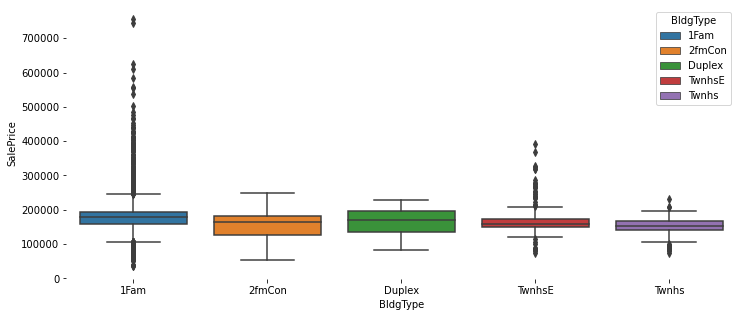

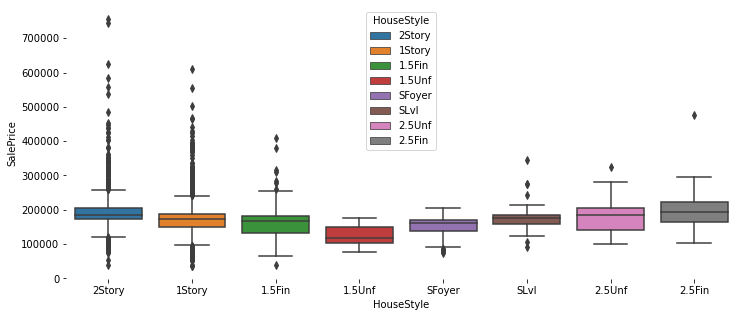

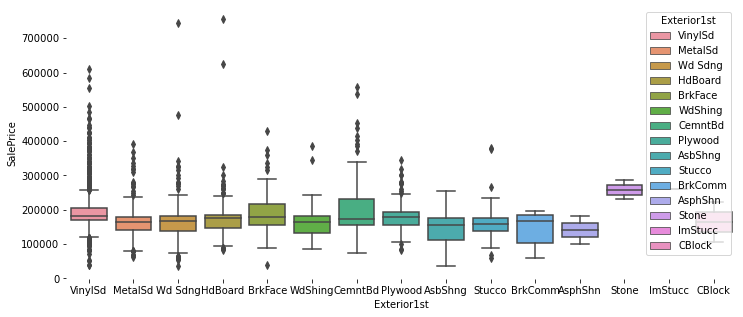

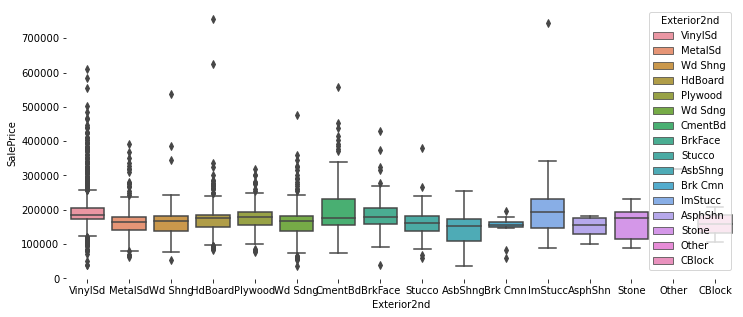

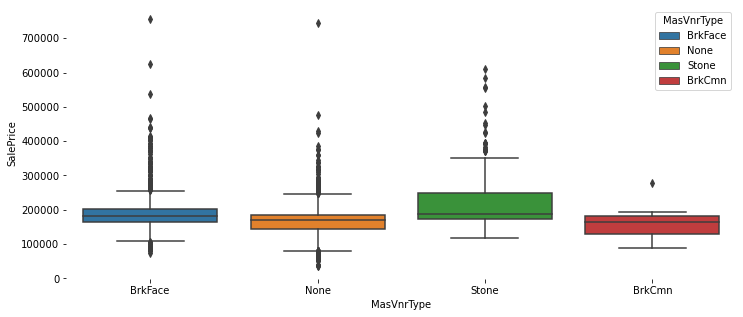

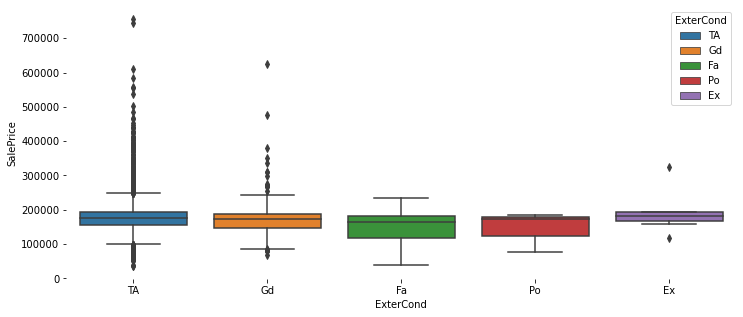

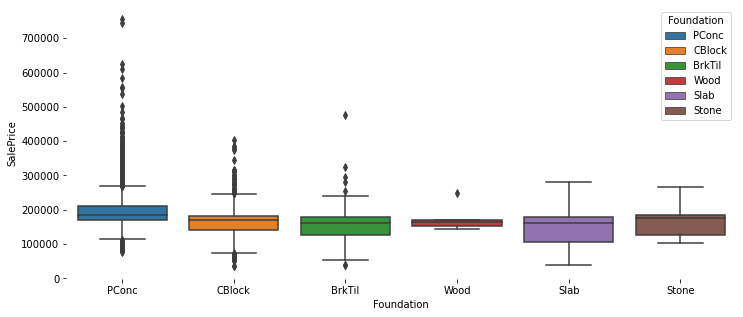

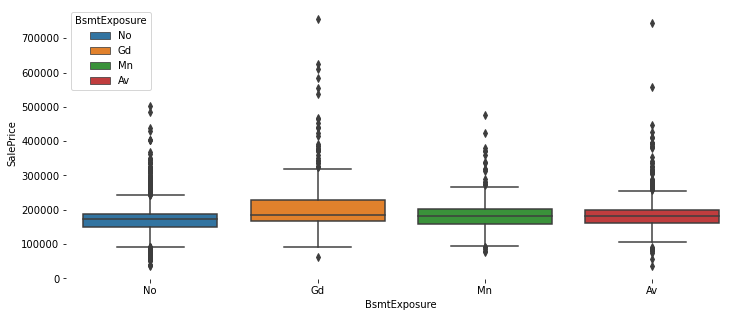

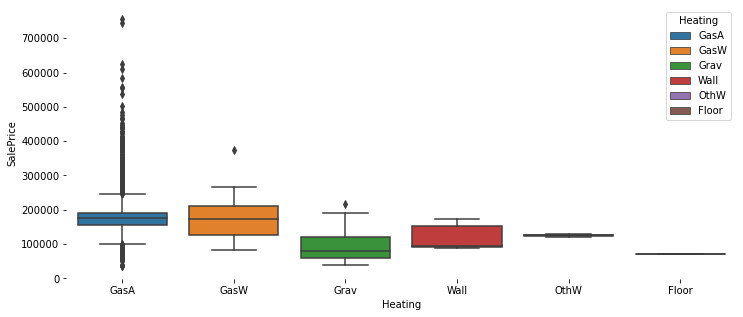

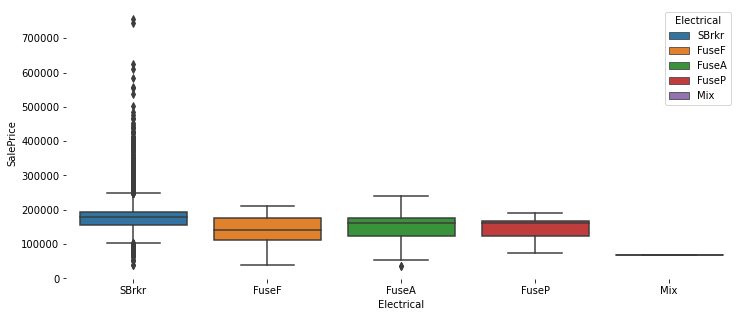

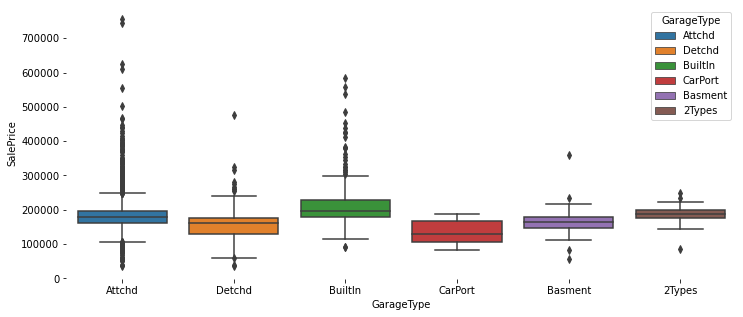

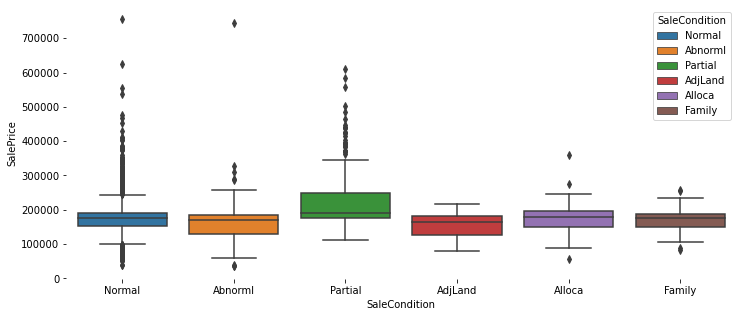

In [96]:
for g in df1[cat_attributes.columns]:
    cat_boxplot(g)